In [24]:
#Import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns

Item features -> Business data from the top50 reviewed restaurant

In [57]:
business = pd.read_json("dataset/Item_features/yelp_academic_dataset_business.json", lines=True, orient='columns')

In [58]:
business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."


In [59]:
business[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by='review_count')[0:50]

,name,review_count,city,stars
113731,Acme Oyster House,7568,New Orleans,4.0
112552,Oceana Grill,7400,New Orleans,4.0
91757,Hattie B’s Hot Chicken - Nashville,6093,Nashville,4.5
143157,Reading Terminal Market,5721,Philadelphia,4.5
147081,Ruby Slipper - New Orleans,5193,New Orleans,4.5
100024,Mother's Restaurant,5185,New Orleans,3.5
31033,Royal House,5070,New Orleans,4.0
31332,Commander's Palace,4876,New Orleans,4.5
4497,Luke,4554,New Orleans,4.0
97331,Cochon,4421,New Orleans,4.0


In [60]:
#Selecting the top50 location with higher number of review_count
New_Orleans_business = business[business['city'] == 'New Orleans']
top50 = New_Orleans_business.sort_values(ascending=False, by="review_count")[0:50]

In [61]:
#Converting JSON to CSV
#New_Orleans_business.to_csv("dataset/Item_features/yelp_academic_dataset_business.csv", index=None)

In [62]:
top50.to_csv("dataset/Item_features/yelp_Item_features.csv", index=None)

In [63]:
top50[['business_id','review_count','attributes']]

,business_id,review_count,attributes
113731,_ab50qdWOk0DdB6XOrBitw,7568,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu..."
112552,ac1AeYqs8Z4_e2X5M3if2A,7400,"{'RestaurantsGoodForGroups': 'True', 'Restaura..."
147081,oBNrLz4EDhiscSlbOl8uAw,5193,"{'NoiseLevel': ''loud'', 'Caters': 'False', 'B..."
100024,iSRTaT9WngzB8JJ2YKJUig,5185,"{'RestaurantsGoodForGroups': 'True', 'BYOBCork..."
31033,VQcCL9PiNL_wkGf-uF3fjg,5070,"{'WiFi': 'u'free'', 'Caters': 'False', 'Outdoo..."
31332,_C7QiQQc47AOEv4PE3Kong,4876,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS..."
4497,GBTPC53ZrG1ZBY3DT8Mbcw,4554,"{'RestaurantsReservations': 'True', 'Restauran..."
97331,6a4gLLFSgr-Q6CZXDLzBGQ,4421,"{'BikeParking': 'True', 'BusinessParking': '{'..."
64541,VaO-VW3e1kARkU9bP1E7Fw,3966,"{'GoodForKids': 'True', 'HasTV': 'True', 'Nois..."
42331,qb28j-FNX1_6xm7u372TZA,3902,"{'GoodForKids': 'True', 'RestaurantsAttire': '..."


In [64]:
# Concatenate attributes element
def flatten(js):
    return pd.DataFrame(js).set_index('pos').squeeze()

pd.concat([top50.drop(['attributes'], axis=1),
           top50.attributes.apply(pd.Series)], axis=1)
           #df.columnB.apply(flatten)], #For dictionary of list

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,WheelchairAccessible,ByAppointmentOnly,DriveThru,BusinessAcceptsBitcoin,GoodForDancing,Smoking,BestNights,Music,Open24Hours,RestaurantsCounterService
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,...,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147081,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100024,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,401 Poydras St,New Orleans,LA,70130,29.949057,-90.067049,3.5,5185,...,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
31033,VQcCL9PiNL_wkGf-uF3fjg,Royal House,441 Royal St,New Orleans,LA,70130,29.956473,-90.066386,4.0,5070,...,True,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
31332,_C7QiQQc47AOEv4PE3Kong,Commander's Palace,1403 Washington Ave,New Orleans,LA,70130,29.928735,-90.084196,4.5,4876,...,True,True,NaN,False,False,u'outdoor',"{'monday': False, 'tuesday': True, 'friday': T...","{'dj': False, 'background_music': False, 'no_m...",NaN,NaN
4497,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,New Orleans,LA,70130,29.950742,-90.070416,4.0,4554,...,True,False,NaN,False,False,u'no',"{'monday': False, 'tuesday': False, 'friday': ...","{'dj': False, 'background_music': False, 'no_m...",NaN,NaN
97331,6a4gLLFSgr-Q6CZXDLzBGQ,Cochon,930 Tchoupitoulas St,New Orleans,LA,70130,29.942280,-90.067268,4.0,4421,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,VaO-VW3e1kARkU9bP1E7Fw,Felix's Restaurant & Oyster Bar,739 Iberville St,New Orleans,LA,70130,29.954680,-90.068945,4.0,3966,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42331,qb28j-FNX1_6xm7u372TZA,Gumbo Shop,630 St Peter St,New Orleans,LA,70116,29.957709,-90.064537,4.0,3902,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting the position of the top50

In [65]:
business = pd.read_csv('dataset/Item_features/yelp_Item_features.csv')
business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""'fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
1,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Seafood, Cajun/Creole, Breakfast ...","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W..."
2,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,1,"{'NoiseLevel': ""'loud'"", 'Caters': 'False', 'B...","Restaurants, American (Traditional), American ...","{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', ..."
3,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,401 Poydras St,New Orleans,LA,70130,29.949057,-90.067049,3.5,5185,1,"{'RestaurantsGoodForGroups': 'True', 'BYOBCork...","Cajun/Creole, Restaurants, Event Planning & Se...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-17:0', '..."
4,VQcCL9PiNL_wkGf-uF3fjg,Royal House,441 Royal St,New Orleans,LA,70130,29.956473,-90.066386,4.0,5070,1,"{'WiFi': ""u'free'"", 'Caters': 'False', 'Outdoo...","American (New), Restaurants, Sandwiches, Seafo...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


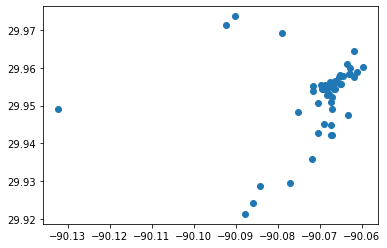

In [66]:
plt.scatter(x=business['longitude'], y=business['latitude'])
plt.show()

In [67]:
# Looking for the position of the top 100
top100 = New_Orleans_business.sort_values(ascending=False, by="review_count")[0:100]
top100.sort_values(ascending=True, by='review_count').head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2858,AzseSGgDC6bVtMPEYo1CNQ,Creole Creamery,4924 Prytania St,New Orleans,LA,70115,29.924394,-90.108503,4.5,921,1,"{'BikeParking': 'True', 'GoodForKids': 'True',...","Food, Ice Cream & Frozen Yogurt","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."


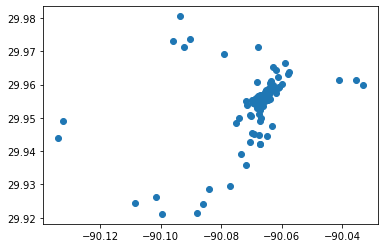

In [68]:
plt.scatter(x=top100['longitude'], y=top100['latitude'])
plt.show()

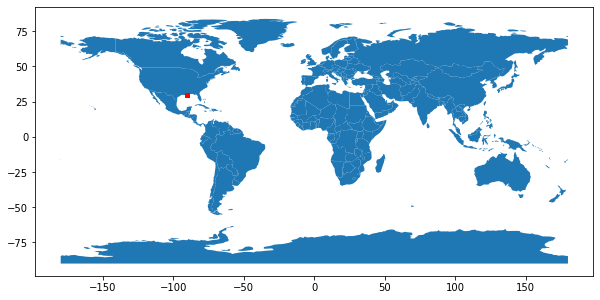

In [69]:
#df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(business['longitude'], business['latitude'])]
gdf = GeoDataFrame(business, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#city = ox.gdf_from_place('São Paulo, São Paulo, Brasil')
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [70]:
BBox = ((business['longitude'].min(),   business['longitude'].max(),      
         business['latitude'].min(), business['latitude'].max()))
BBox

(-90.1322295, -90.0598538142, 29.9212715, 29.9736823589)

In [71]:
img_plt = plt.imread('img/map_HD.png')

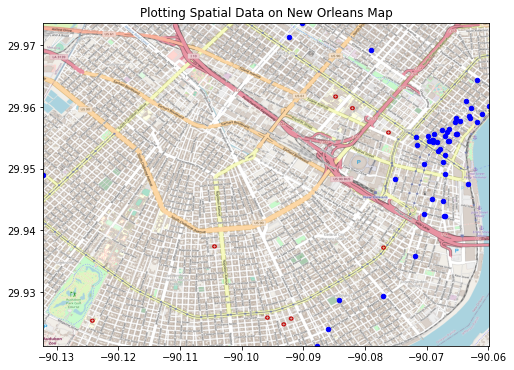

In [72]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(business.longitude, business.latitude, zorder=1, alpha= 1, c='b', s=20)
ax.set_title('Plotting Spatial Data on New Orleans Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(img_plt, zorder=0, extent = BBox, aspect= 'equal')

User-Item Interaction

In [86]:
user_item = pd.read_json('dataset/User-Item_Interaction/yelp_academic_dataset_review.json', lines=True, orient='columns', chunksize=100000) # 70 chunk

In [93]:
#Create a fake initial dataframe to concatenate the real one
New_Orleans_user_item = pd.DataFrame
for item in user_item:
    New_Orleans_user_item = item.sort_values(ascending=False, by="user_id")[0:1]
    break

In [95]:
#Extract the useful User-Item interaction related to the top50 business
for user_item_data in user_item:
    for business_id in top50['business_id']:
        New_Orleans_user_item_buss_id = user_item_data[user_item_data['business_id'] == business_id]
        New_Orleans_user_item = pd.concat([New_Orleans_user_item, New_Orleans_user_item_buss_id], ignore_index=True, axis=0)

In [98]:
#New_Orleans_user_item.drop(index=New_Orleans_user_item.index[0], axis=0, inplace=True)
#New_Orleans_user_item.to_csv("dataset/User-Item_Interaction/yelp_UserItem_Interaction.csv", index=None)

User_features

In [1]:
import pandas as pd

In [2]:
user = pd.read_json("dataset/User_features/yelp_academic_dataset_user.json", lines=True, orient='columns', chunksize=100000) #Create 7 chunk

In [101]:
print(type(user))

<class 'pandas.io.json._json.JsonReader'>


In [3]:
userItem_Interaction = pd.read_csv("dataset/User-Item_Interaction/yelp_UserItem_Interaction.csv")

In [6]:
for user_chunk in user:
    temp_dataFrame = user_chunk.sort_values(ascending=True, by='user_id')[0:1]
    break

In [15]:
userItem_Interaction = userItem_Interaction.drop_duplicates(subset=['user_id'])

In [17]:
for user_frame in user:
    for user_id in userItem_Interaction['user_id']:
        user_Profile_By_Id = user_frame[user_frame['user_id'] == user_id]
        temp_dataFrame = pd.concat([temp_dataFrame, user_Profile_By_Id], ignore_index=True, axis=0)

In [24]:
#temp_dataFrame.drop(index=temp_dataFrame.index[0], axis=0, inplace=True)
#temp_dataFrame.to_csv("dataset/User_features/yelp_UserFeatures.csv", index=None)

In [25]:
temp_dataFrame.size

1014552

Verify of the dataset

In [1]:
import pandas as pd
item_features = pd.read_csv("dataset/Item_features/yelp_Item_features.csv")
user_features = pd.read_csv("dataset/User_features/yelp_UserFeatures.csv")
user_item_interaction = pd.read_csv("dataset/User-Item_Interaction/yelp_UserItem_Interaction.csv")

In [6]:
print("item_features shape: ",item_features.shape)
print("user_features shape: ",user_features.shape)
print("user_item_interaction shape: ",user_item_interaction.shape)

item_features shape:  (50, 14)
user_features shape:  (46116, 22)
user_item_interaction shape:  (122769, 9)


In [18]:
item_features.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""'fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."


In [32]:
item_features['stars'].value_counts()

4.0    31
4.5    13
3.5     6
Name: stars, dtype: int64

In [8]:
user_features.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,01HpNrCSLNWbQG9Fv3c4Pw,Grace,93,2014-10-26 17:31:18,23,6,4,NaN,LdkRO8Nc9M5Fp_SP7Jo8ww,1,...,1,0,0,0,1,0,0,0,0,2


In [54]:
user_features['review_count'].value_counts()
#sns.histplot(data=user_features['review_count'].value_counts(), kde=True)
#sns.relplot(data=user_features['review_count'].value_counts())

2      2624
1      2569
3      2414
4      2196
5      1956
       ... 
682       1
421       1
0         1
652       1
733       1
Name: review_count, Length: 677, dtype: int64


In [9]:
user_item_interaction.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,C_9T5IhqLkydXBu8nRwF9A,roaeY04lH9ZLxF8YrIoauQ,DcBLYSvOuWcNReolRVr12A,1,0,0,0,Dragos is outraged they talk about they food b...,2018-05-13 05:42:00


In [55]:
user_item_interaction['text'][0]

'Dragos is outraged they talk about they food but they food is tasteless I had lobster Marco the lobster was very rubbery and the pasta had no flavor and was undercooked the shrimps in the pasta was not fresh shrimp I will not be patronizing dragos again'

In [35]:
user_item_interaction['stars'].value_counts()
#sns.histplot(data=user_item_interaction['stars'], kde=True)

5    60530
4    32215
3    14424
2     8365
1     7235
Name: stars, dtype: int64